## 1: Face Recognition, but not evil this time

Using the faces dataset in:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
```

If you use the `faces.target` and `faces.target_names` attributes, you can build a facial recognition algorithm.

Use sklearn **gridsearch** (or an equivalent, like random search) to optimize the model for accuracy. Try both a SVM-based classifier and a logistic regression based classifier (with a feature pipeline of your choice) to get the best model. You should have at least 80% accuracy.

In [1]:
# ref : https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

%matplotlib inline
sns.set()

In [3]:
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=60)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1348
n_features: 2914
n_classes: 8


In [4]:
###############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

In [5]:
from time import time
from sklearn.decomposition import PCA
###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

pca = PCA(n_components=n_components, whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
###############################################################################
# Train a SVM classification model

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

In [7]:
###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")

y_pred = clf.predict(X_test_pca)


print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.44      0.61        16
     Colin Powell       0.79      0.92      0.85        59
  Donald Rumsfeld       0.93      0.71      0.81        35
    George W Bush       0.82      0.97      0.89       129
Gerhard Schroeder       0.96      0.81      0.88        27
      Hugo Chavez       0.92      0.61      0.73        18
Junichiro Koizumi       1.00      0.81      0.90        16
       Tony Blair       0.91      0.84      0.87        37

         accuracy                           0.85       337
        macro avg       0.92      0.76      0.82       337
     weighted avg       0.87      0.85      0.85       337

[[  7   3   0   6   0   0   0   0]
 [  0  54   0   4   0   0   0   1]
 [  0   3  25   5   0   0   0   2]
 [  0   2   2 125   0   0   0   0]
 [  0   1   0   4  22   0   0   0]
 [  0   3   0   3   1  11   0   0]
 [  0   1   0   1   0   1  13   0]
 [

In [8]:
###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

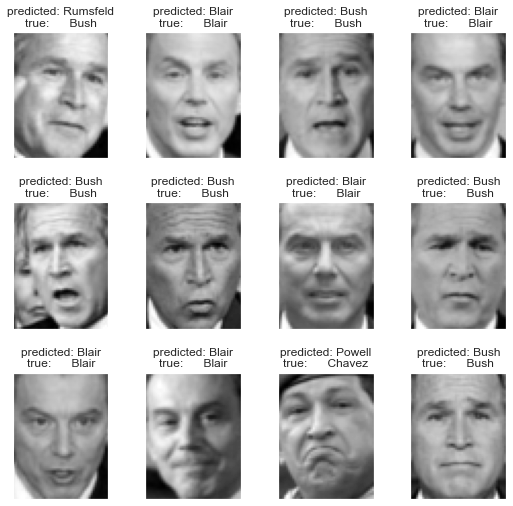

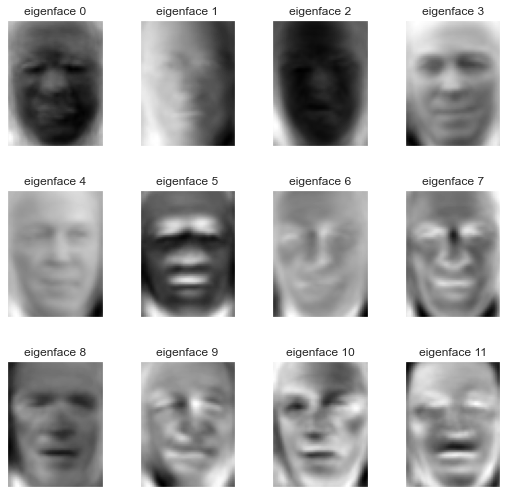

In [9]:
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

# 2: Bag of Words, Bag of Popcorn

By this point, you are ready for the [Bag of Words, Bag of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. 

Use NLP feature pre-processing (using, SKLearn, Gensim, Spacy or Hugginface) to build the best classifier you can. Use a  feature pipeline, and gridsearch for your final model.

A succesful project should get 90% or more on a **holdout** dataset you kept for yourself.

In [10]:
# ref : https://www.kaggle.com/viroviro/sentiment-analysis-tf-idf-logistic-regression
# ref : https://www.kaggle.com/parveshdhawan/bag-of-words-meets-bags-of-popcorn?scriptVersionId=6368569

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import re
import string
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('wordnet')

sns.set()

In [12]:
training = pd.read_table('data/all_data/LabeledTrainData.tsv')
test = pd.read_table('data/all_data/testData.tsv')
print(training.shape)
training.head()

(25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [13]:
test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [14]:
training.groupby('sentiment').describe().T

sentiment                                                      0  \
id     count                                               12500   
       unique                                              12500   
       top                                               12097_4   
       freq                                                    1   
review count                                               12500   
       unique                                              12432   
       top     This show comes up with interesting locations ...   
       freq                                                    3   

sentiment                                                      1  
id     count                                               12500  
       unique                                              12500  
       top                                               10078_8  
       freq                                                    1  
review count                                               12500  
       unique                                              12472  
       top     I am decidedly not in the target audience for ...  
       freq                                                    2

In [15]:
from bs4 import BeautifulSoup

#Creating a function for cleaning of data
def clean_text(raw_text):
    # 1. remove HTML tags
    raw_text = BeautifulSoup(raw_text).get_text() 
    
    # 2. removing all non letters from text
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create variable which contain set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop word & returning   
    return [w for w in words if not w in stops]

In [16]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer

bow_transform = CountVectorizer(analyzer=clean_text).fit(training['review'])  #bow = bag of word

#Creating bag of words for our review variable
review_bow = bow_transform.transform(training['review'])

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)
review_tfidf = tfidf_transformer.transform(review_bow)

In [18]:
review_tfidf

<25000x74065 sparse matrix of type '<class 'numpy.float64'>'
	with 2450404 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training['review'], training['sentiment'], test_size=0.22, random_state=101)

len(X_train), len(X_test), len(X_train) + len(X_test)

(19500, 5500, 25000)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)

In [21]:
#Hold Out Set Result
predictions = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

0.8874545454545455

In [22]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2691
           1       0.90      0.87      0.89      2809

    accuracy                           0.89      5500
   macro avg       0.89      0.89      0.89      5500
weighted avg       0.89      0.89      0.89      5500



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_logit = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline_logit.fit(training['review'],training['sentiment'])
test['sentiment'] = pipeline_logit.predict(test['review'])

In [24]:
test.head()

,id,review,sentiment
0,12311_10,Naturally in a film who's main themes are of m...,1
1,8348_2,This movie is a disaster within a disaster fil...,0
2,5828_4,"All in all, this is a movie for kids. We saw i...",1
3,7186_2,Afraid of the Dark left me with the impression...,1
4,12128_7,A very accurate depiction of small time mob li...,1
